# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [417]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# if you would like to create all your charts with same size --> plt.rcParams["figure.figsize"] = (10, 6)

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [418]:
plt.rcParams["figure.figsize"] = (10, 6)

In [419]:
#Logistic Regression
import pickle

In [420]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #as model olur fakat literatür #lm = LinearRegression() #lm linear regresyon değişkeni
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV

In [421]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [422]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

## Exploratory Data Analysis and Visualization

In [423]:
# Either read the excel or csv

#data = pd.read_excel('")

In [424]:
data_xls = pd.read_excel('Raisin_Dataset.xlsx')
data_xls.to_csv('Raisin_Dataset_1.csv', encoding='utf-8')

In [425]:
df = pd.read_csv("Raisin_Dataset_1.csv")
df.head(5)

,Unnamed: 0,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [426]:
df[df.columns[1]]

0      87524
1      75166
2      90856
3      45928
4      79408
       ...  
895    83248
896    87350
897    99657
898    93523
899    85609
Name: Area, Length: 900, dtype: int64

In [427]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [428]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [429]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [430]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


### Balanced - Unbalanced Data ?

In [431]:
df["Class"].value_counts() # Our data is a balanced data

Kecimen    450
Besni      450
Name: Class, dtype: int64

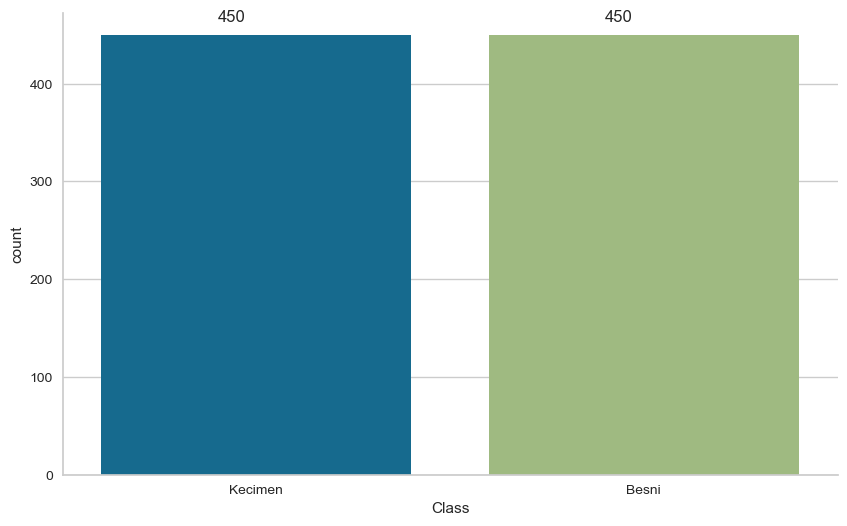

In [432]:
ax = sns.countplot(df['Class'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

### Outlier Check

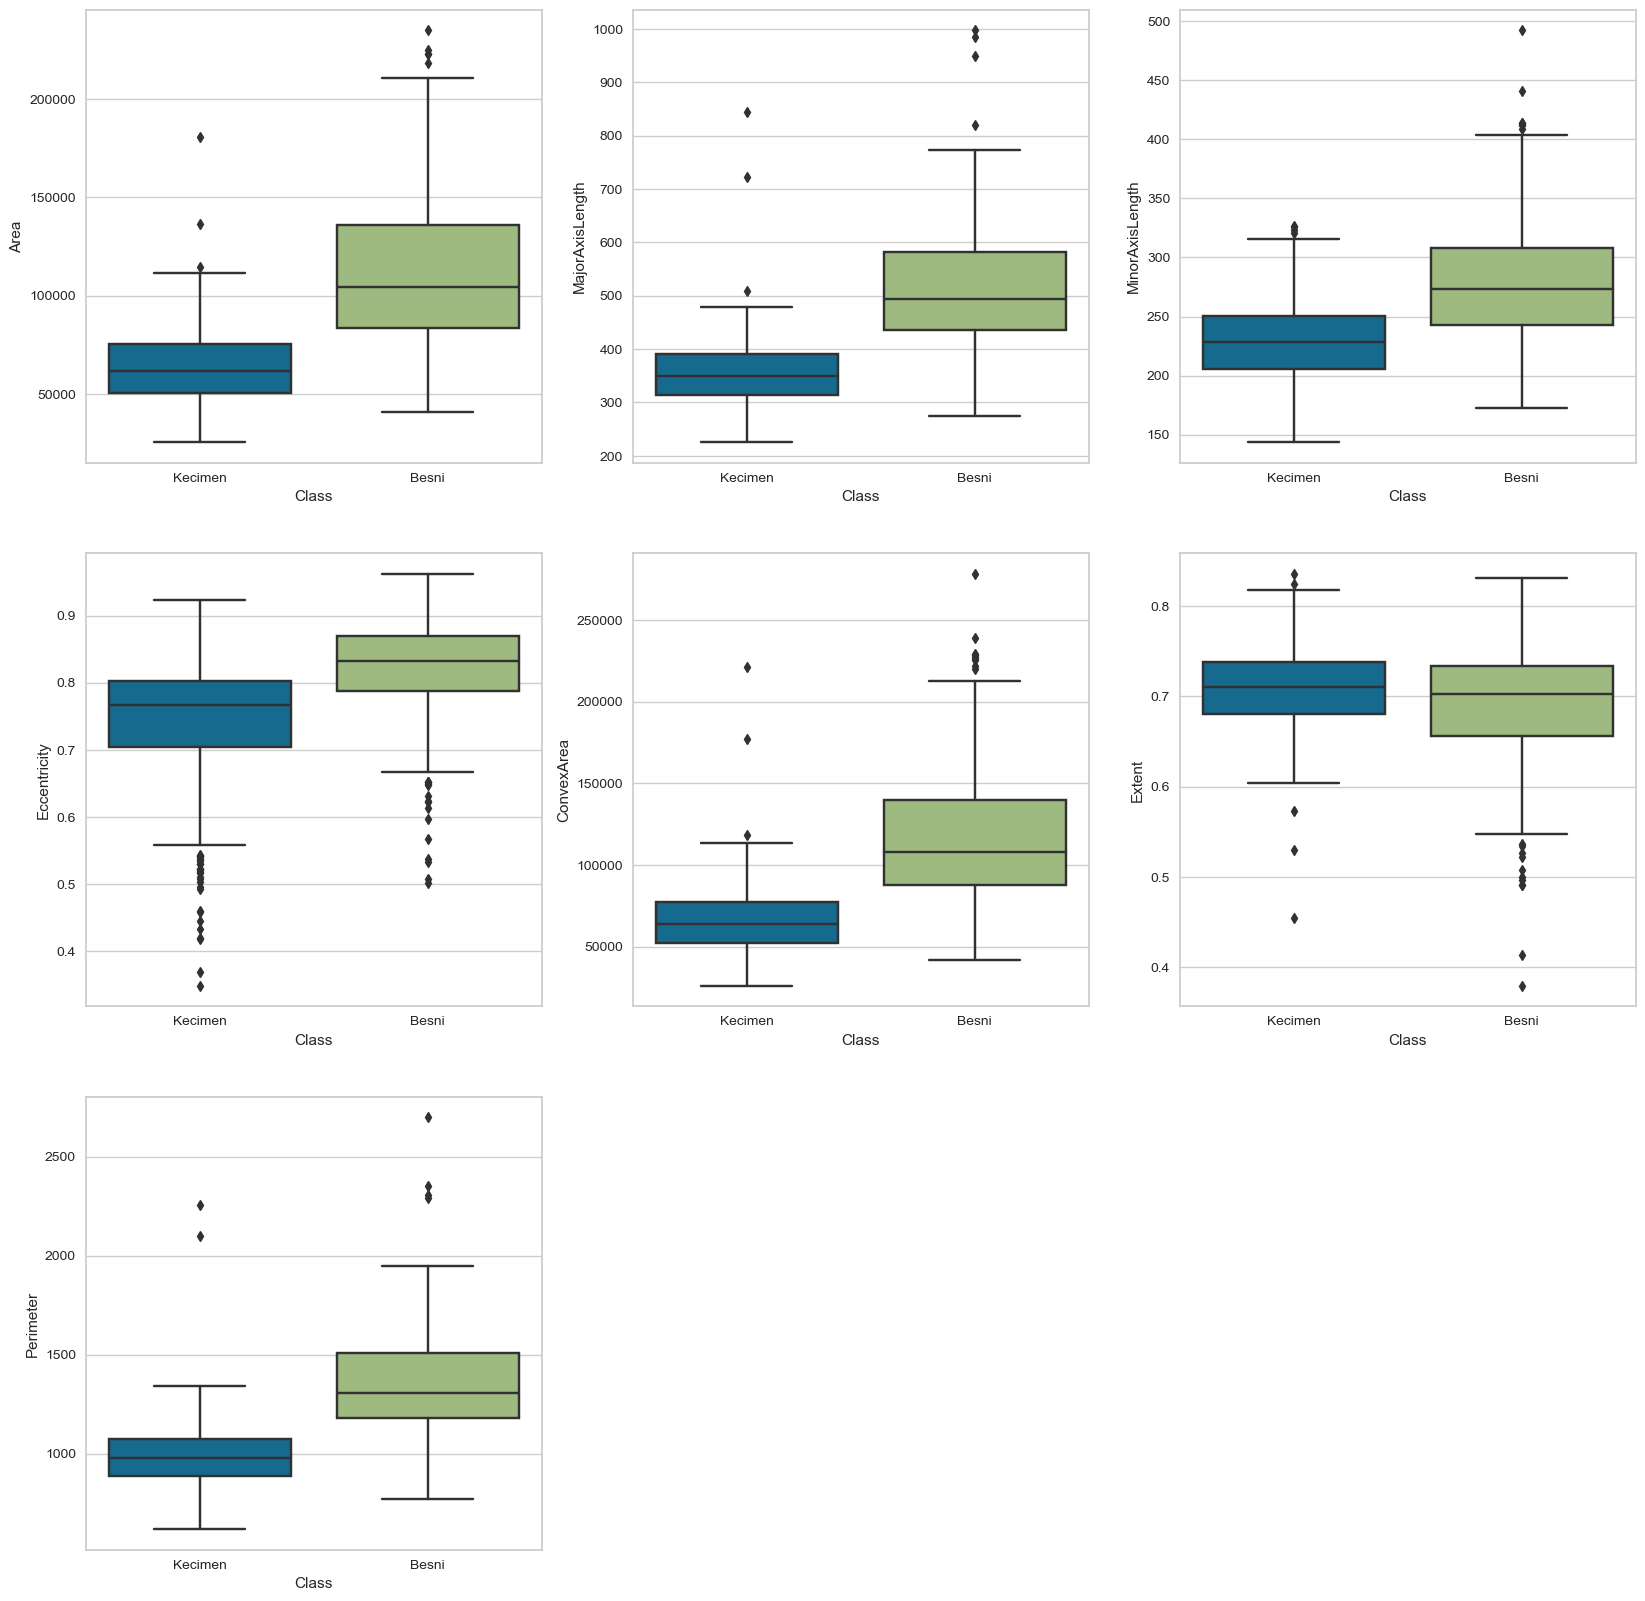

In [433]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

### Scatterplot

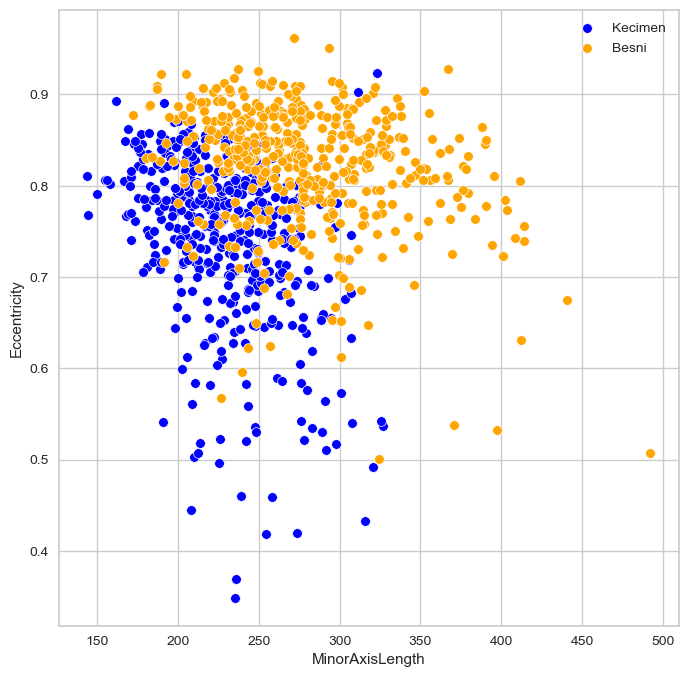

In [434]:
# Scatter Plot and Distribution
Kecimen = df[df.Class == "Kecimen"]
Besni = df[df.Class == "Besni"]

plt.figure(figsize = (8,8))
plt.scatter(Kecimen.MinorAxisLength, Kecimen.Eccentricity, color = "blue", label = "Kecimen", linewidths=0.5 ,edgecolors="white")
plt.scatter(Besni.MinorAxisLength, Besni.Eccentricity, color = "orange", label = "Besni", linewidths=0.5, edgecolors="white")
plt.xlabel("MinorAxisLength")
plt.ylabel("Eccentricity")
plt.legend()
plt.show()

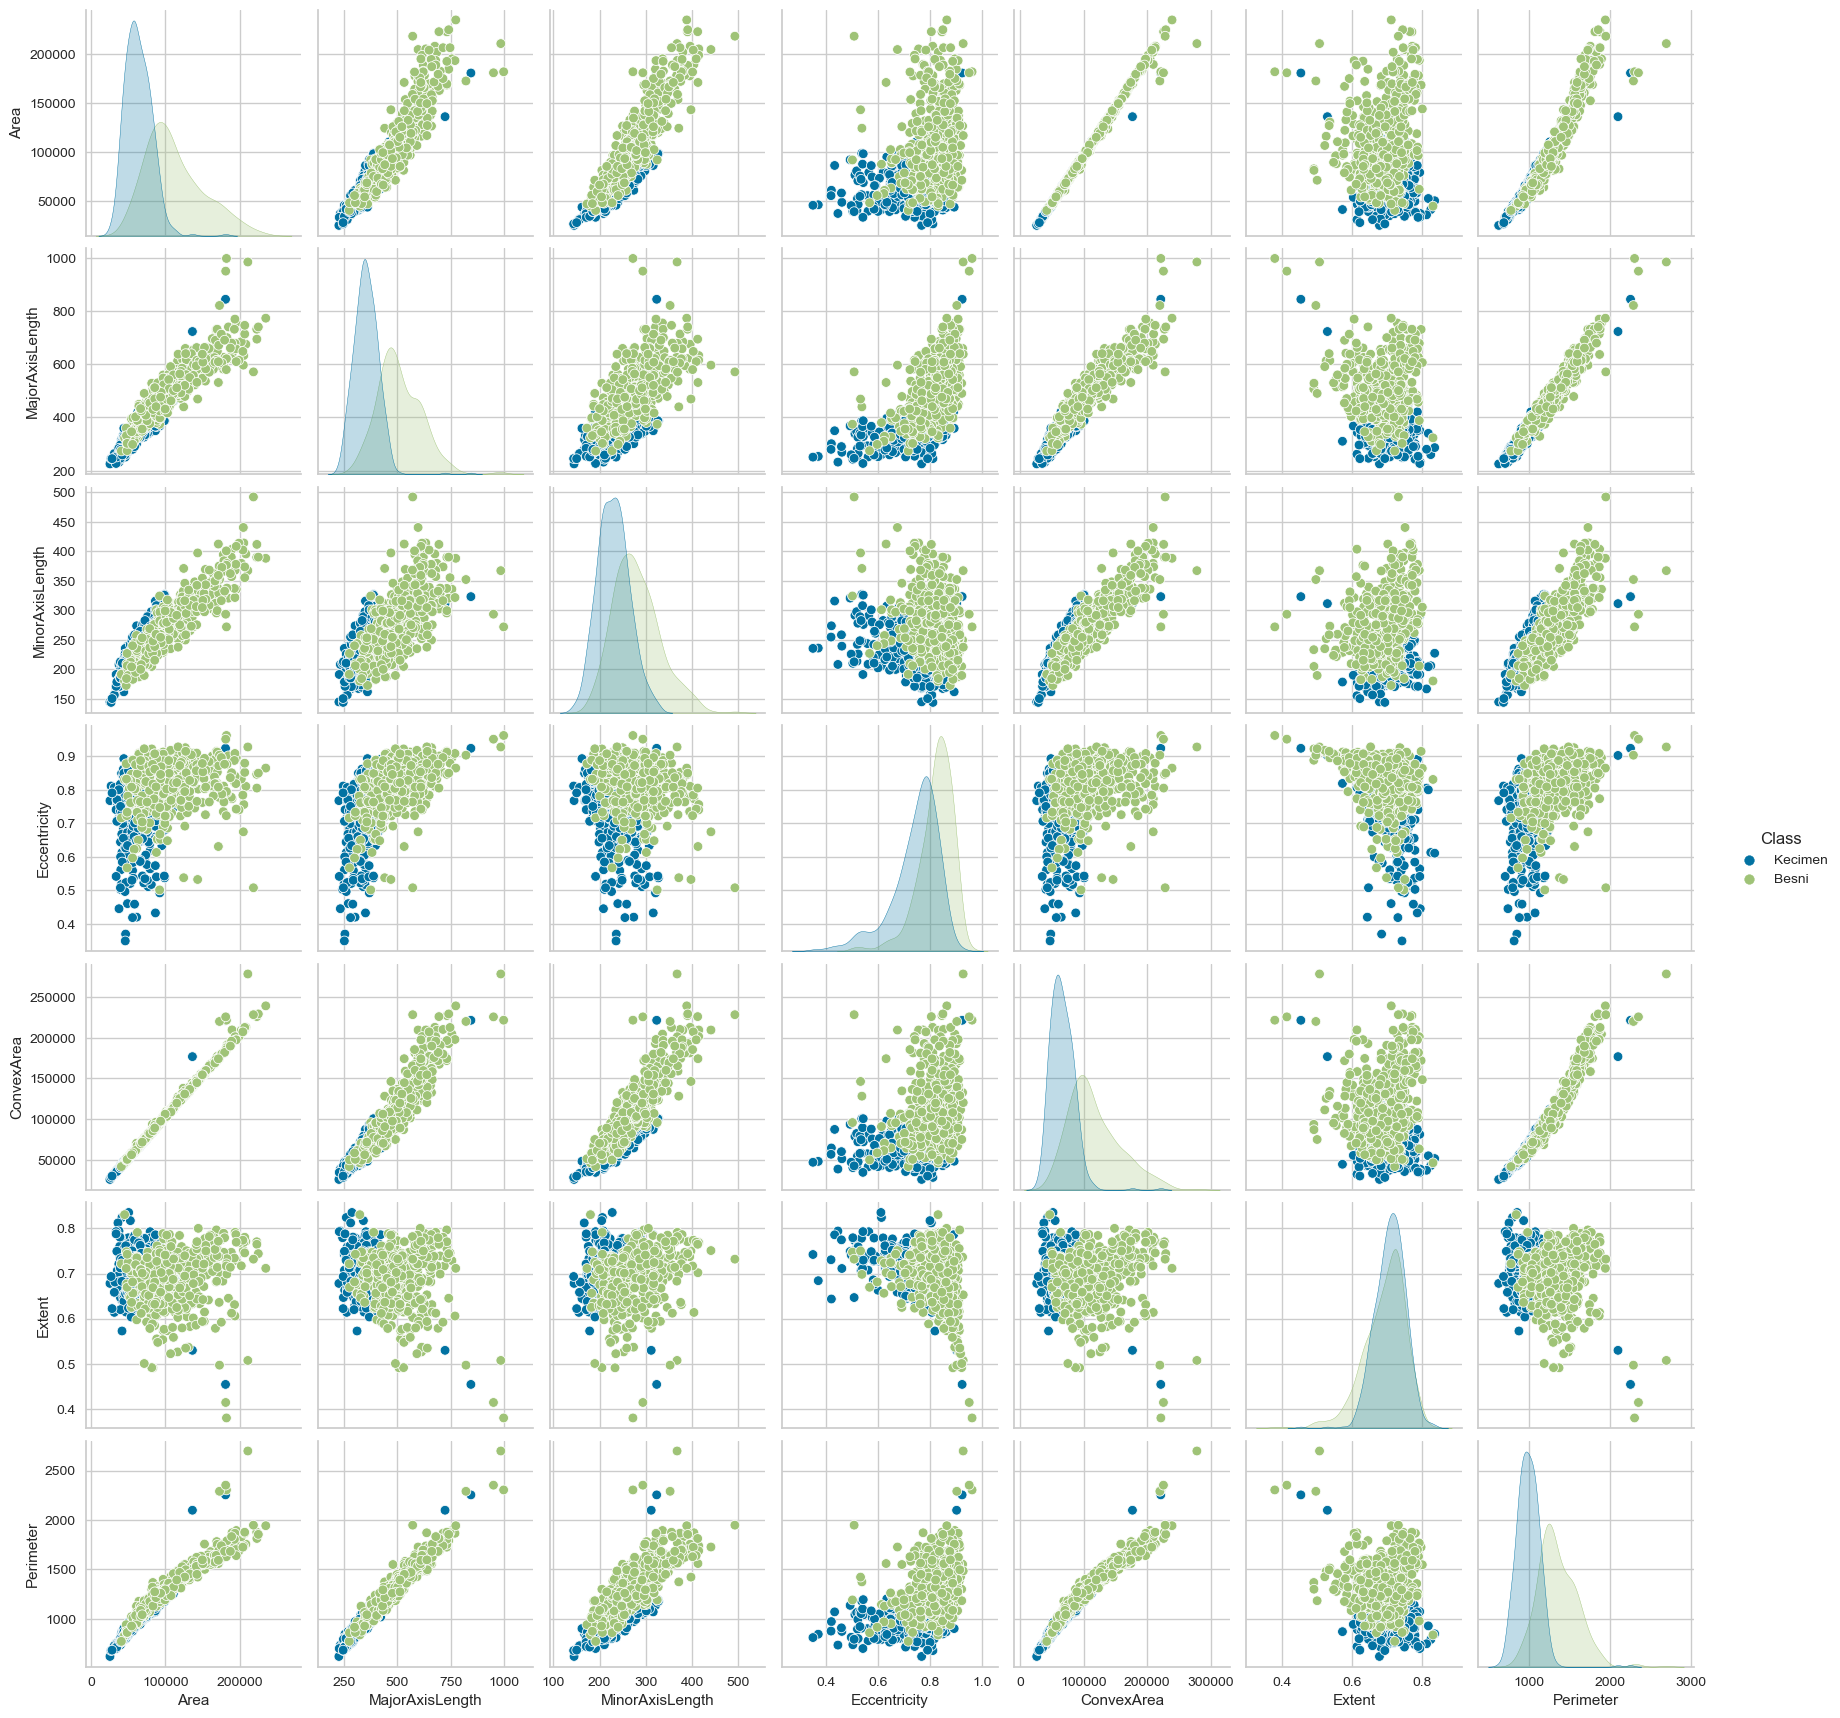

In [435]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(df, hue = "Class")

### Correlations

In [436]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


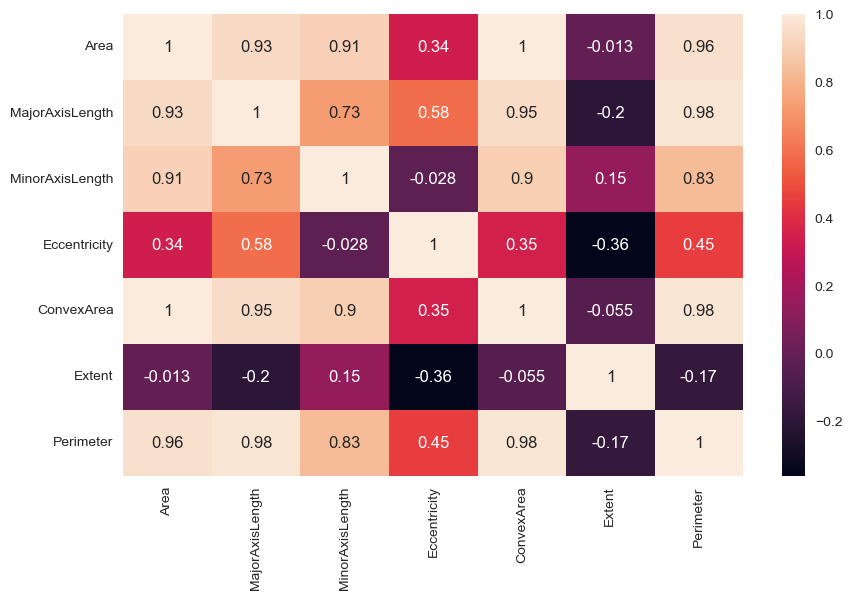

In [437]:
sns.heatmap(df.corr(), annot = True);

## Train | Test Split and Scaling

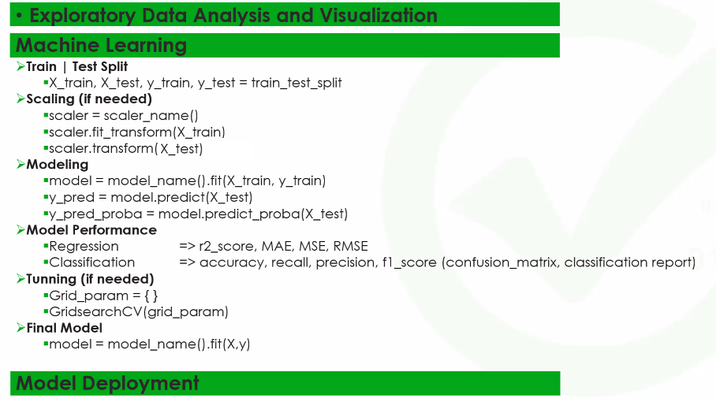

In [438]:
# Data 1000'e kadar (row 1000'e kadarsa) %70 Train, %30 Test (Train için En düşük bu olmalı)
# Data 1000 - 100.000 ler arasında ise %90-80 Train %10-20 Test
# Data 100.000 - 1.000.000 lar arasında ise %95 Train %5 Test
# Data milyonlar üzerinde ise %99 Train, %1 Test olarak bölünse iyi olur

In [439]:
df['Class'].replace({'Kecimen': 0, 'Besni': 1}, inplace=True)

In [440]:
df.sample(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
66,54056,332.267641,208.619016,0.778323,55539,0.674553,912.153,0
179,48693,306.573907,204.280621,0.745653,50298,0.740128,848.422,0
449,41995,259.208878,210.350798,0.584337,43443,0.729701,801.526,0


In [441]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [442]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

### Scaling

In [444]:
scaler = StandardScaler()

In [445]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [446]:
from sklearn.linear_model import LogisticRegression

In [447]:
log_model=LogisticRegression()

In [448]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [449]:
y_pred=log_model.predict(X_test_scaled)

In [450]:
y_pred_proba = log_model.predict_proba(X_test_scaled) ## olasılık hesaplarını görmek için kullanılan kod

In [451]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
71,60449,383.800250,208.168783,0.840128,64346,0.676345,1054.198,0,0,0.364618
600,89721,530.156574,223.499933,0.906794,95252,0.547433,1295.377,1,1,0.932124
91,56469,325.341425,225.115024,0.721960,58697,0.685736,933.896,0,0,0.098793
636,105347,476.803500,282.025816,0.806310,108072,0.769035,1266.876,1,1,0.792028
849,102722,416.898937,317.542803,0.647956,107169,0.724420,1261.988,1,1,0.526240
263,50649,327.110995,199.540920,0.792394,52462,0.766294,875.267,0,0,0.091154
472,108161,485.102646,286.033191,0.807670,111765,0.707906,1305.144,1,1,0.847700
641,131847,560.420908,302.640666,0.841650,134950,0.744314,1446.145,1,1,0.968763
664,104669,546.672756,248.527908,0.890686,110984,0.687346,1398.545,1,1,0.960075
390,49821,319.082063,202.236495,0.773491,51829,0.677975,907.423,0,0,0.102951


## Model Performance

In [452]:
from sklearn.metrics import confusion_matrix, classification_report

In [453]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [454]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[127   8]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       135
           1       0.94      0.87      0.90       135

    accuracy                           0.90       270
   macro avg       0.91      0.90      0.90       270
weighted avg       0.91      0.90      0.90       270


Train_Set
[[277  38]
 [ 55 260]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       315
           1       0.87      0.83      0.85       315

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       630
weighted avg       0.85      0.85      0.85       630



### Cross Validate

In [455]:
from sklearn.model_selection import cross_validate

In [456]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.008976,0.006019,0.878788,0.906250,0.892308,0.888889
2,0.008978,0.003989,0.857143,0.937500,0.895522,0.888889
3,0.006979,0.005984,0.935484,0.906250,0.920635,0.920635
4,0.009974,0.005984,0.807692,0.656250,0.724138,0.746032
5,0.010010,0.005947,0.950000,0.593750,0.730769,0.777778
6,0.008976,0.003990,0.966667,0.935484,0.950820,0.952381
7,0.010969,0.003994,0.783784,0.935484,0.852941,0.841270
8,0.009007,0.006983,0.774194,0.774194,0.774194,0.777778
9,0.010968,0.003957,0.866667,0.838710,0.852459,0.857143
10,0.010970,0.003987,0.884615,0.741935,0.807018,0.825397


In [457]:
df_scores.mean()[2:]

test_precision    0.870503
test_recall       0.822581
test_f1           0.840080
test_accuracy     0.847619
dtype: float64

In [458]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[127   8]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       135
           1       0.94      0.87      0.90       135

    accuracy                           0.90       270
   macro avg       0.91      0.90      0.90       270
weighted avg       0.91      0.90      0.90       270


Train_Set
[[277  38]
 [ 55 260]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       315
           1       0.87      0.83      0.85       315

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       630
weighted avg       0.85      0.85      0.85       630



## GridSearchCV

In [459]:
np.logspace(-1, 5, 20) ## C parametresi değerleri

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [460]:
from sklearn.model_selection import GridSearchCV

In [461]:
model = LogisticRegression(random_state=42, max_iter=100000)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight=['balanced', None]
solver = ['lbfgs', 'liblinear', 'sag', 'saga']

param_grid = {"penalty" : penalty,
             "C" : C,
             "class_weight": class_weight,
             "solver" : solver}

grid_model = GridSearchCV(estimator= model,
                          param_grid= param_grid,
                         cv = 10,
                         scoring = "recall",
                         n_jobs = -1) ## -1 Tüm işlemcileri buraya yönlendirmek için kullanılır.

In [462]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [463]:
grid_model.best_params_

{'C': 0.20691380811147897,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'saga'}

In [464]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[126   9]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       135
           1       0.93      0.87      0.90       135

    accuracy                           0.90       270
   macro avg       0.90      0.90      0.90       270
weighted avg       0.90      0.90      0.90       270


Train_Set
[[274  41]
 [ 55 260]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       315
           1       0.86      0.83      0.84       315

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       630
weighted avg       0.85      0.85      0.85       630



In [465]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [466]:
confusion_matrix(y_test, y_pred)

array([[127,   8],
       [ 18, 117]], dtype=int64)

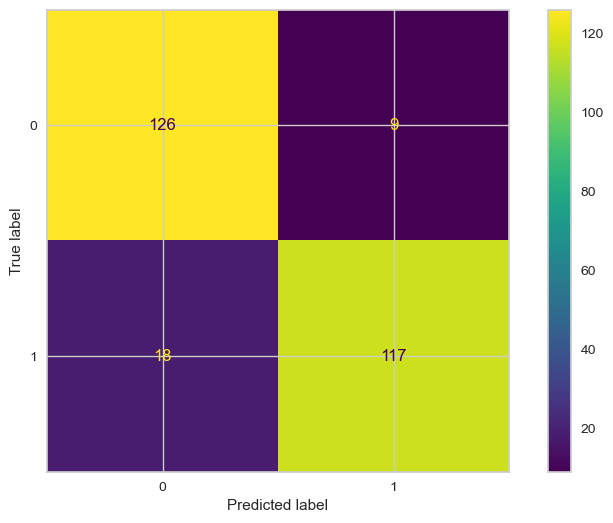

In [467]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [468]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

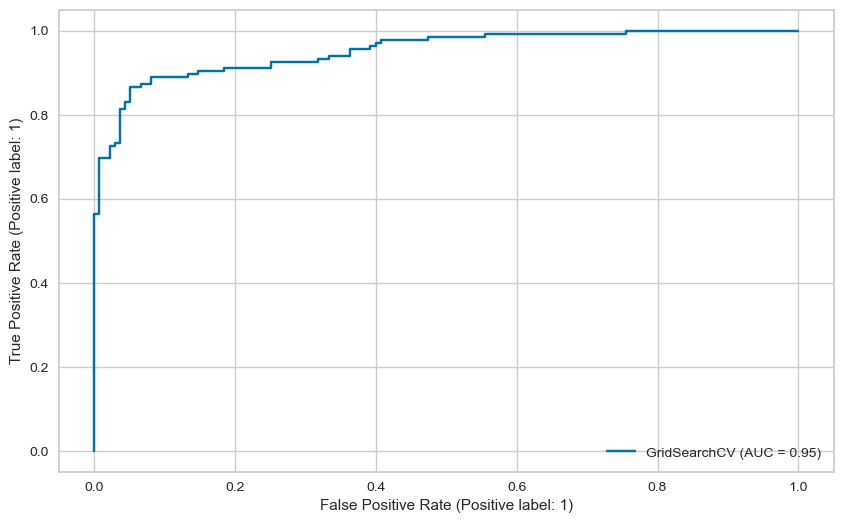

In [469]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show()

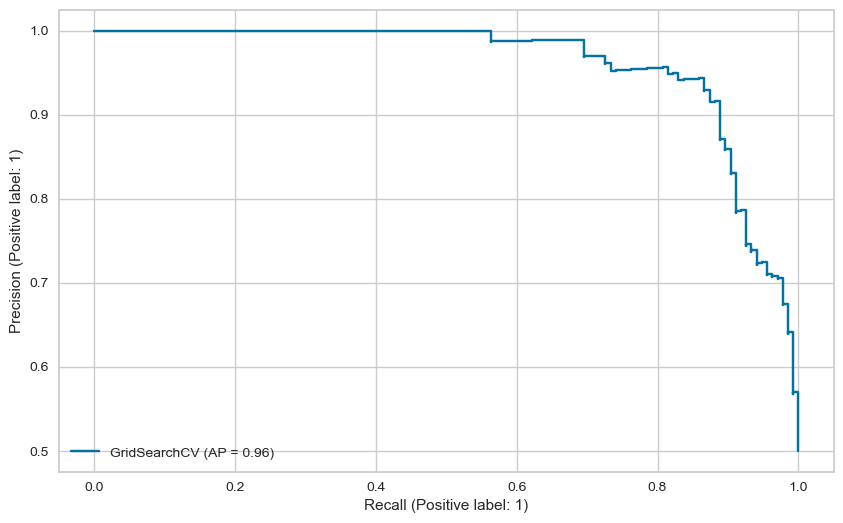

In [470]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show()

## Finding Best Threshold for max recall score

best treshold u bulmak için test setini kullanmıyoruz burada sclae edilmiş train setini kullanıcaz. Data sızıntısını engellemek için. Kısaca bu tresholdubulurken mutlaka train setinden faydalanıcaz ve burada bulduğumuz tresholda göre test setinde tahmin yapacağız.

işin içinde olasılık varsa modelin ayır ediciliğinin treshold unu da bulabiliriz.

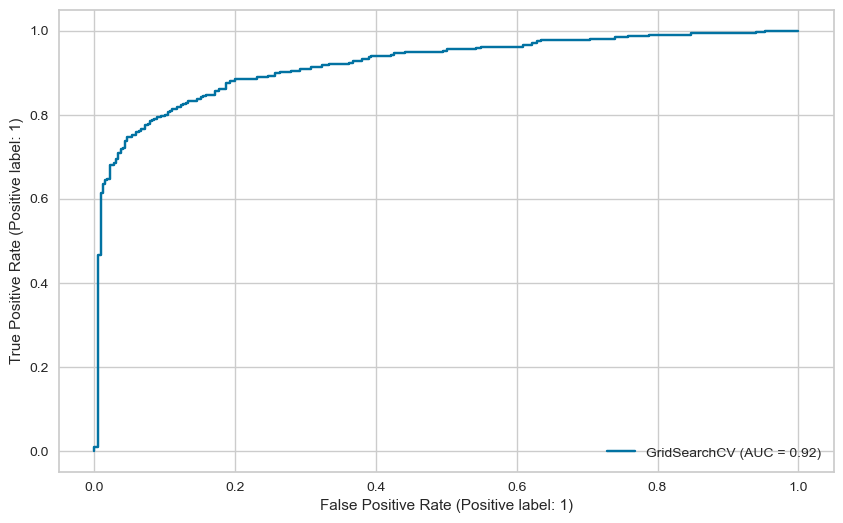

In [471]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [472]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9188208616780046

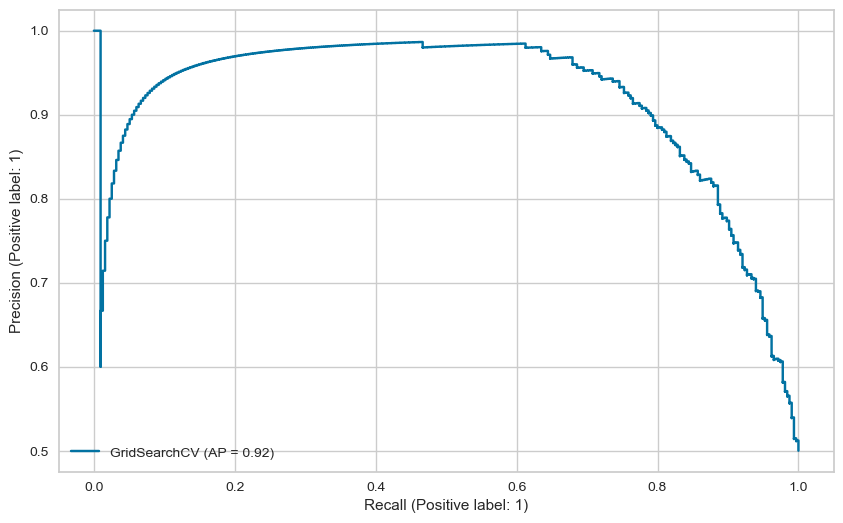

In [473]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);
plt.show()

In [474]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9160068467232748

In [475]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5913020717005952

In [476]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) 

In [477]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[130   5]
 [ 30 105]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       135
           1       0.95      0.78      0.86       135

    accuracy                           0.87       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.88      0.87      0.87       270



In [478]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[290  25]
 [ 68 247]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       315
           1       0.91      0.78      0.84       315

    accuracy                           0.85       630
   macro avg       0.86      0.85      0.85       630
weighted avg       0.86      0.85      0.85       630



In [479]:
from sklearn.model_selection import StratifiedKFold

In [480]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [481]:
model = LogisticRegression(C= 0.2, class_weight= 'balanced',penalty= 'l1',solver= 'saga')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      84.60%  std 2.46%
Precision-1   90.62%  std 5.35%
Recall-1      77.79%  std 6.82%
F1_score-1    83.36%  std 3.11%


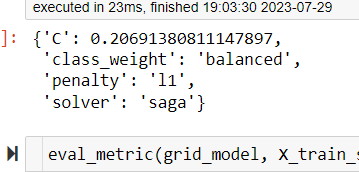

## Finding Best Threshold for the most balanced score between recall and precision

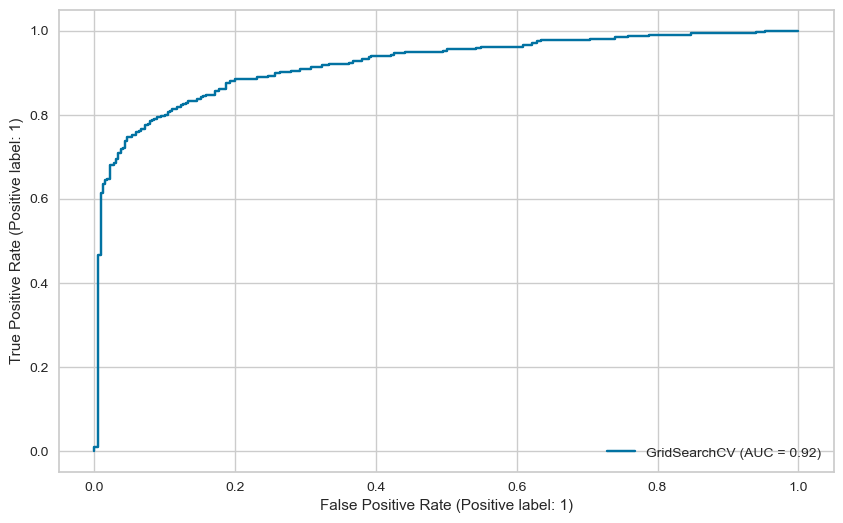

In [482]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [483]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9188208616780046

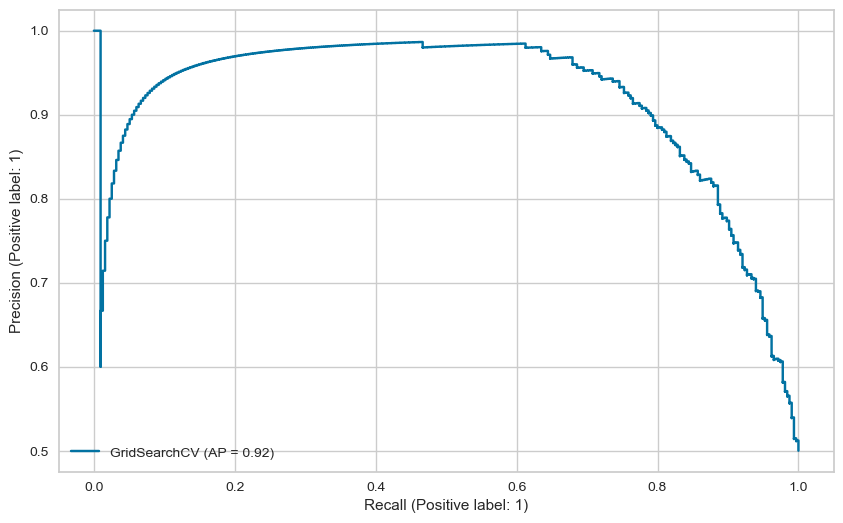

In [484]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);
plt.show()

In [485]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9160068467232748

In [486]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5913020717005952

In [487]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) 

In [488]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[130   5]
 [ 30 105]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       135
           1       0.95      0.78      0.86       135

    accuracy                           0.87       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.88      0.87      0.87       270



In [489]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[290  25]
 [ 68 247]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       315
           1       0.91      0.78      0.84       315

    accuracy                           0.85       630
   macro avg       0.86      0.85      0.85       630
weighted avg       0.86      0.85      0.85       630



In [490]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

# Final Model and Deployment

In [491]:
scaler = StandardScaler().fit(X)

In [492]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb'))

In [493]:
X_scaled = scaler.transform(X)

In [494]:
final_model = LogisticRegression(C=0.2, class_weight = "balanced", penalty='l1', solver='saga').fit(X_scaled, y)

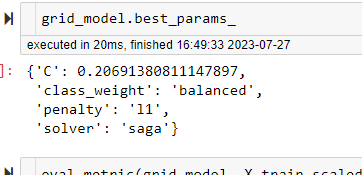

In [495]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

In [496]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [497]:
my_dict_new = {"Area": [8754, 75166,90856,45928,79408],
          "MajorAxisLength": [443, 405,442,286,352],
          "MinorAxisLength": [253, 243,266,208,290],
          "Eccentricity": [0.80, 0.80,0.79,0.68,0.56],
          "ConvexArea": [90546, 78789,93717,47336,81463],
          "Extent": [0.75, 0.68,0.63,0.70,0.79],
          "Perimeter": [1184, 1121,1208,844,1073]
          }

In [498]:
sample = pd.DataFrame(my_dict_new)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,8754,440,253,0.80,90546,0.75,1184
1,75166,405,243,0.80,78789,0.68,1121
2,90856,442,266,0.79,93717,0.63,1208
3,45928,286,208,0.68,47336,0.70,844
4,79408,352,290,0.56,81463,0.79,1073


In [499]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [500]:
sample_scaled = scaler_raisin.transform(sample)
sample_scaled

array([[-2.02794357,  0.07820988, -0.02978582,  0.20447783, -0.01570903,
         0.94486345,  0.06612777],
       [-0.32421719, -0.22359065, -0.22994145,  0.20447783, -0.3042482 ,
        -0.36505387, -0.16412513],
       [ 0.07829241,  0.09545562,  0.2304165 ,  0.09369687,  0.06211335,
        -1.30070909,  0.15384317],
       [-1.07428573, -1.24971244, -0.93048616, -1.12489369, -1.07616471,
         0.00920822, -1.17650696],
       [-0.21539337, -0.68060288,  0.71079002, -2.45426521, -0.23862314,
         1.69338763, -0.33955592]])

In [501]:
final_model = pickle.load(open("final_model_raisin", "rb"))

In [502]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [503]:
predictions2

[1, 0, 1, 0, 0]

In [504]:
#predictions = final_model.predict(sample_scaled)
#predictions_proba = final_model.predict_proba(sample_scaled)
#predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [505]:
sample["pred"] = predictions
sample["pred_proba_kecimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_kecimen,pred_proba_besni
0,8754,440,253,0.80,90546,0.75,1184,1,0.365821,0.634179
1,75166,405,243,0.80,78789,0.68,1121,1,0.498086,0.501914
2,90856,442,266,0.79,93717,0.63,1208,1,0.293074,0.706926
3,45928,286,208,0.68,47336,0.70,844,0,0.969161,0.030839
4,79408,352,290,0.56,81463,0.79,1073,0,0.883974,0.116026


# Conclusion 